In [30]:
import obspy
import glob
import os, sys
import numpy as np
from obspy import read, read_inventory
import obspy.signal
import matplotlib.pyplot as plt

In [31]:
earthquakes = read('./seismogram_v2/earthquakes/*.SAC')
explosions = read('./seismogram_v2/explosions/*.SAC')

/usr/local/lib/python3.6/site-packages/obspy/core/trace.py:187: UserWarning: Calibration factor set to 0.0!
  warnings.warn(msg, UserWarning)


In [32]:
print('Number of earthquakes: {}'.format(len(earthquakes)))
print('Number of Explosions: {}'.format(len(explosions)))

Number of earthquakes: 12962
Number of Explosions: 10498


In [33]:
eqntrk = []
exntrk = []
for i in range(len(earthquakes)):
    eqntrk.append(earthquakes[i].stats.network)

for i in range(len(explosions)):
    exntrk.append(explosions[i].stats.network)
    

In [34]:
print(np.unique(eqntrk))

['AE' 'AK' 'AT' 'AV' 'AZ' 'BK' 'CC' 'CI' 'CM' 'CN' 'CU' 'DK' 'DR' 'EP' 'G'
 'GE' 'GS' 'HW' 'II' 'IM' 'IU' 'IW' 'KP' 'LB' 'LD' 'LI' 'MB' 'MX' 'N4' 'NE'
 'NM' 'NN' 'NO' 'NR' 'NU' 'OK' 'OO' 'PE' 'PM' 'PN' 'PO' 'PR' 'PY' 'RV' 'SC'
 'SS' 'SV' 'TA' 'TS' 'UO' 'US' 'UU' 'UW' 'VE' 'WC' 'WI' 'X1' 'X5' 'X9' 'XK'
 'XL' 'XN' 'XQ' 'XR' 'XU' 'XV' 'XZ' 'Y5' 'YH' 'YN' 'YO' 'YW' 'Z4' 'ZC']


In [35]:
print(np.unique(exntrk))

['AE' 'AK' 'AT' 'AV' 'AZ' 'BK' 'CC' 'CI' 'CM' 'CN' 'CU' 'DK' 'DR' 'G' 'GE'
 'GS' 'II' 'IM' 'IU' 'IW' 'LB' 'LD' 'MB' 'MC' 'MX' 'N4' 'NA' 'NE' 'NM' 'NU'
 'OK' 'OO' 'PB' 'PE' 'PN' 'PR' 'PY' 'RV' 'SC' 'SV' 'TA' 'TR' 'TS' 'UO' 'US'
 'UU' 'UW' 'VE' 'WC' 'WI' 'X4' 'X8' 'XD' 'XI' 'XO' 'XQ' 'XT' 'XW' 'XY' 'YE'
 'YN' 'YZ' 'Z9' 'ZC']


In [36]:
net = exntrk + eqntrk
print(np.unique(net))

['AE' 'AK' 'AT' 'AV' 'AZ' 'BK' 'CC' 'CI' 'CM' 'CN' 'CU' 'DK' 'DR' 'EP' 'G'
 'GE' 'GS' 'HW' 'II' 'IM' 'IU' 'IW' 'KP' 'LB' 'LD' 'LI' 'MB' 'MC' 'MX' 'N4'
 'NA' 'NE' 'NM' 'NN' 'NO' 'NR' 'NU' 'OK' 'OO' 'PB' 'PE' 'PM' 'PN' 'PO' 'PR'
 'PY' 'RV' 'SC' 'SS' 'SV' 'TA' 'TR' 'TS' 'UO' 'US' 'UU' 'UW' 'VE' 'WC' 'WI'
 'X1' 'X4' 'X5' 'X8' 'X9' 'XD' 'XI' 'XK' 'XL' 'XN' 'XO' 'XQ' 'XR' 'XT' 'XU'
 'XV' 'XW' 'XY' 'XZ' 'Y5' 'YE' 'YH' 'YN' 'YO' 'YW' 'YZ' 'Z4' 'Z9' 'ZC']


In [37]:
earthquakes.remove_response(output='VEL', pre_filt=pre_filt)

ValueError: No response information found. Use `inventory` parameter to specify an inventory with response information.

In [14]:
# SACPZ.US.OXF.--.BHZ
paz_file = 'SACPZ.'+ tr.stats['sac']['knetwk']+'.'+ tr.stats['sac']['kstnm'] + '.--.'+ tr.stats['sac']['kcmpnm']
root_path = './seismogram_v2/earthquakes/2004-12-26-mw90-sumatra/'
path_name = str(root_path + paz_file)
attach_paz(tr, path_name)
tr.stats

         network: CI
         station: MLAC
        location: 
         channel: BHZ
       starttime: 2004-12-26T01:13:38.013800Z
         endtime: 2004-12-26T01:34:37.963800Z
   sampling_rate: 20.0
           delta: 0.05
            npts: 25200
           calib: 6.21403e+08
         _format: SAC
             paz: AttribDict({'seismometer_gain': 1.0, 'digitizer_gain': 1.0, 'poles': [(-0.0123+0.0123j), (-0.0123-0.0123j), (-502+188j), (-502-188j)], 'zeros': [0j, 0j, 0j, (1000+0j)], 'sensitivity': 1.0, 'gain': 178580700000.0})
             sac: AttribDict({'delta': 0.050000001, 'scale': 6.2140301e+08, 'b': 0.00079999998, 'e': 1259.9508, 'o': -886.01379, 'stla': 37.630192, 'stlo': -118.83605, 'stel': 2162.0, 'stdp': 0.0, 'evla': 3.4124999, 'evlo': 95.901199, 'evdp': 26.1, 'dist': 14229.828, 'az': 35.024719, 'baz': 313.81171, 'gcarc': 127.97759, 'cmpaz': 0.0, 'cmpinc': 0.0, 'nzyear': 2004, 'nzjday': 361, 'nzhour': 1, 'nzmin': 13, 'nzsec': 38, 'nzmsec': 13, 'nvhdr': 6, 'npts': 25200, 'iftyp

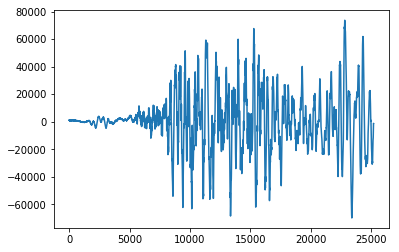

In [13]:
plt.plot(tr.data)
plt.show()

In [5]:
print(explosions[0].stats)

         network: 1F
         station: SAB1
        location: 
         channel: BHE
       starttime: 2016-01-06T01:43:43.000000Z
         endtime: 2016-01-06T02:04:43.000000Z
   sampling_rate: 50.0
           delta: 0.02
            npts: 63001
           calib: 1.20135e+09
         _format: SAC
             sac: AttribDict({'delta': 0.02, 'scale': 1.20135e+09, 'b': 0.0, 'e': 1260.0, 'o': -822.0, 'stla': 14.7484, 'stlo': -91.578796, 'stel': 2288.0, 'stdp': 0.0, 'evla': 41.299599, 'evlo': 129.04671, 'evdp': 0.0, 'dist': 12538.181, 'az': 43.089725, 'baz': 327.85742, 'gcarc': 112.76357, 'cmpaz': 90.0, 'cmpinc': 90.0, 'nzyear': 2016, 'nzjday': 6, 'nzhour': 1, 'nzmin': 43, 'nzsec': 43, 'nzmsec': 0, 'nvhdr': 6, 'npts': 63001, 'iftype': 1, 'leven': 1, 'kstnm': 'SAB1', 'kevnm': 'North Korea', 'kcmpnm': 'BHE', 'knetwk': '1F', 'kinst': 'Nanometr'})


In [6]:
stations = []
for i in range(len(st)):
    stations.append(st[i].stats['sac']['kstnm'])
stations = np.unique(stations)

In [7]:
broads = []
for i in stations:
    ncomp = len(st.select(station=i))
    if ncomp == 3:
        broads.append(i)
#         print('Station: {} and no of comp: {}'.format(i, ncomp))

### Processing: zero mean and unit standard deviation

In [6]:
from scipy import stats

raw_eqs = earthquakes
raw_expl = explosions

for i in range(len(earthquakes)):
    earthquakes[i].data = stats.zscore(earthquakes[i].data)

for i in range(len(explosions)):
    explosions[i].data = stats.zscore(explosions[i].data)
    

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:2247: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


### show processed seismograms

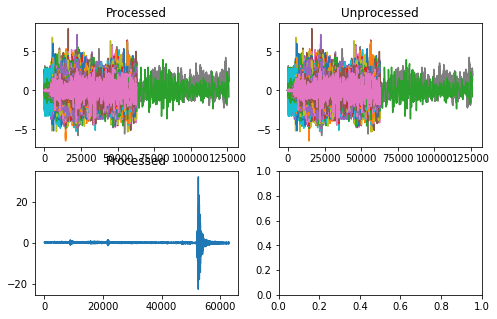

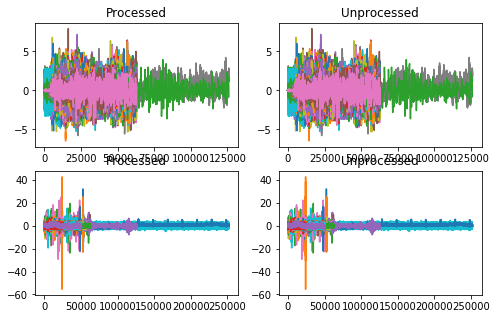

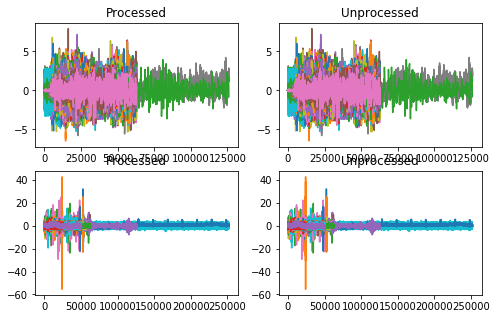

In [11]:
plt.figure(figsize=(8, 5))

for i in range(len(earthquakes)):
    if (earthquakes[i].stats['sac']['kcmpnm'] == 'BHZ'):
        plt.subplot(221)
        plt.plot(earthquakes[i].data)
        plt.title('Processed')
        
        plt.subplot(222)
        plt.plot(raw_eqs[i].data)
        plt.title('Unprocessed')
        
for i in range(len(explosions)):
    if (explosions[i].stats['sac']['kcmpnm'] == 'BHZ'):
        plt.subplot(223)
        plt.plot(explosions[i].data)
        plt.title('Processed')
        
        plt.subplot(224)
        plt.plot(raw_expl[i].data)
        plt.title('Unprocessed')
plt.show()

In [24]:
import pickle

# write python dict to a file

earthquke_data = {'earthquakes': earthquakes}
output = open('earthquakes_seismograms.pkl', 'wb')
pickle.dump(earthquke_data, output)
output.close()

explosions_data = {'explosions': explosions}
output = open('explosions_seismograms.pkl', 'wb')
pickle.dump(explosions_data, output)
output.close()

OSError: [Errno 22] Invalid argument

In [32]:
%matplotlib tk
def plot_seismograms(st):
    
    plt.figure(figsize=(10, 5))
    for i in range(len(st)):
        if (st[i].stats['sac']['kcmpnm'] == 'BHZ'):
            plt.subplot(311)
            plt.plot(st[i].data, 'b-')
            plt.title('Vertical component')

        elif (st[i].stats['sac']['kcmpnm'] == 'BHE'):
            plt.subplot(312)
            plt.plot(st[i].data, 'b-')
            plt.title('East-west component')

        elif (st[i].stats['sac']['kcmpnm'] == 'BHN'):
            plt.subplot(313)
            plt.plot(st[i].data, 'b-')
            plt.title('North-south component')

    plt.xlabel('Time minutes')
    plt.tight_layout()
    plt.show()

In [33]:
plot_seismograms(earthquakes)

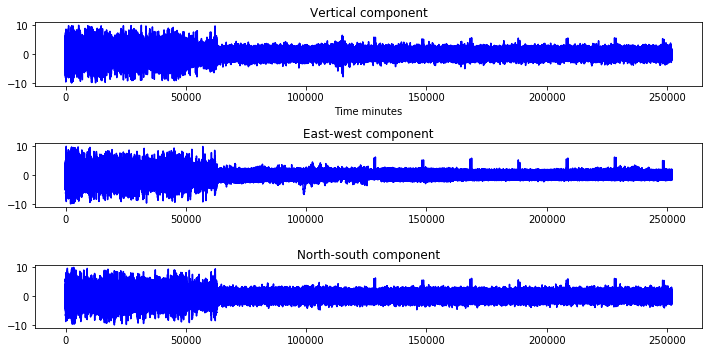

In [31]:
plot_seismograms(explosions)

In [17]:
plt.plot(np.mean(explosions[0:100]))
plt.show()

TypeError: Trace ID differs

In [91]:
import librosa
import scipy as sp
import scipy.signal as signal
aa = librosa.feature.rmse(y=ss[0].data)

In [95]:
ss = st.select(station=broads[100])
data = ss[0].data
sample_rate = ss[0].stats.sampling_rate
f, Pxx_den = signal.periodogram(data, sample_rate)

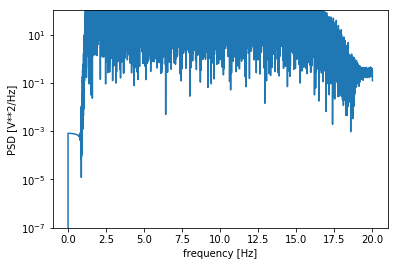

In [96]:
plt.semilogy(f, Pxx_den)
plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [99]:
np.sqrt(Pxx_den.max())

50.532509295753336

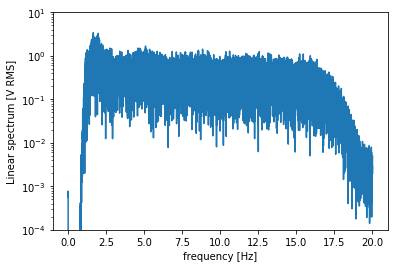

In [100]:
f, Pxx_spec = signal.periodogram(data, sample_rate, 'flattop', scaling='spectrum')
plt.figure()
plt.semilogy(f, np.sqrt(Pxx_spec))
plt.ylim([1e-4, 1e1])
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.show()


In [101]:
np.sqrt(Pxx_spec.max())

3.4125940076090702